In [72]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
import numpy as np
import pylab as plt
from linearclassifier import linear_predict, perceptron_update, plot_predictions, log_reg_train
from scipy.io import loadmat
from __future__ import division

In [74]:
# load cardio data from MATLAB data file

variables = dict()
loadmat('processedCardio.mat', variables)

train_labels = variables['trainLabels'].ravel() - 1 # the original MATLAB data was 1-indexed
test_labels = variables['testLabels'].ravel() - 1
train_data = variables['trainData']
test_data = variables['testData']

# get data dimensions and sizes
num_dim, num_train = train_data.shape
_, num_test = test_data.shape

classes = np.unique(train_labels)
num_classes = len(classes)

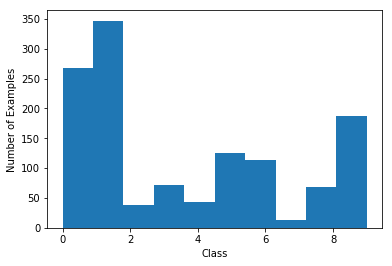

In [75]:
plt.hist(train_labels)
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.show()

In [76]:
# Perceptron experiment

epochs = 40

model = { 'weights': np.zeros((num_dim, num_classes)) }
train_accuracy = np.zeros(epochs)
test_accuracy = np.zeros(epochs)

for epoch in range(epochs):
    # first measure training and testing accuracy
    predictions = linear_predict(train_data, model)
    train_accuracy[epoch] = np.sum(predictions == train_labels) / num_train

    predictions = linear_predict(test_data, model)
    test_accuracy[epoch] = np.sum(predictions == test_labels) / num_test

    # run perceptron training
    mistakes = 0
    for i in range(num_train):
        correct = perceptron_update(train_data[:, i], model, train_labels[i])
        
        if not correct:
            mistakes += 1
    
    print("Finished epoch %d with %d mistakes." % (epoch, mistakes))

Finished epoch 0 with 427 mistakes.
Finished epoch 1 with 363 mistakes.
Finished epoch 2 with 330 mistakes.
Finished epoch 3 with 308 mistakes.
Finished epoch 4 with 310 mistakes.
Finished epoch 5 with 312 mistakes.
Finished epoch 6 with 282 mistakes.
Finished epoch 7 with 287 mistakes.
Finished epoch 8 with 304 mistakes.
Finished epoch 9 with 272 mistakes.
Finished epoch 10 with 268 mistakes.
Finished epoch 11 with 265 mistakes.
Finished epoch 12 with 294 mistakes.
Finished epoch 13 with 289 mistakes.
Finished epoch 14 with 265 mistakes.
Finished epoch 15 with 276 mistakes.
Finished epoch 16 with 280 mistakes.
Finished epoch 17 with 279 mistakes.
Finished epoch 18 with 275 mistakes.
Finished epoch 19 with 274 mistakes.
Finished epoch 20 with 264 mistakes.
Finished epoch 21 with 277 mistakes.
Finished epoch 22 with 257 mistakes.
Finished epoch 23 with 245 mistakes.
Finished epoch 24 with 256 mistakes.
Finished epoch 25 with 255 mistakes.
Finished epoch 26 with 257 mistakes.
Finished ep

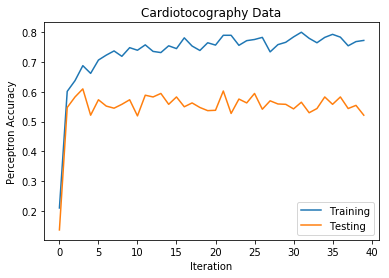

In [77]:
# Plot results of perceptron

train_line = plt.plot(range(epochs), train_accuracy, label="Training")
test_line = plt.plot(range(epochs), test_accuracy, label="Testing")
plt.title('Cardiotocography Data')
plt.xlabel('Iteration')
plt.ylabel('Perceptron Accuracy')
plt.legend()

plt.show()

In [105]:
# Logistic regression gradient check

# first check if the gradient and objective function are consistent with each other
_ = log_reg_train(train_data, train_labels, {'lambda': 0.1}, 
              {'weights': np.random.randn(num_dim * num_classes)}, check_gradient=True)

Provided gradient differed from numerical approximation by 8.532605e-03 (should be below 1e-3)


In [106]:
# Train logistic regression

lambda_vals = 10 ** np.linspace(-12, 2, 15)

model = {'weights': np.zeros((num_dim, num_classes))}
    
train_accuracy = np.zeros(lambda_vals.size)
test_accuracy = np.zeros(lambda_vals.size)

for i in range(lambda_vals.size):
    params = {'lambda': lambda_vals[i]}
    
    model = log_reg_train(train_data, train_labels, params, model)
    
    print("Finished learning with lambda = %e" % params['lambda'])
    
    train_predictions = linear_predict(train_data, model)
    train_accuracy[i] = np.sum(train_predictions == train_labels) / num_train

    test_predictions = linear_predict(test_data, model)
    test_accuracy[i] = np.sum(test_predictions == test_labels) / num_test

Finished learning with lambda = 1.000000e-12
Finished learning with lambda = 1.000000e-11
Finished learning with lambda = 1.000000e-10
Finished learning with lambda = 1.000000e-09
Finished learning with lambda = 1.000000e-08
Finished learning with lambda = 1.000000e-07
Finished learning with lambda = 1.000000e-06
Finished learning with lambda = 1.000000e-05
Finished learning with lambda = 1.000000e-04
Finished learning with lambda = 1.000000e-03
Finished learning with lambda = 1.000000e-02
Finished learning with lambda = 1.000000e-01
Finished learning with lambda = 1.000000e+00
Finished learning with lambda = 1.000000e+01
Finished learning with lambda = 1.000000e+02


[ 0.63176471  0.63176471  0.63176471  0.63176471  0.62117647  0.61529412
  0.60352941  0.60823529  0.62352941  0.61647059  0.57647059  0.55764706
  0.55058824  0.55764706  0.52823529]


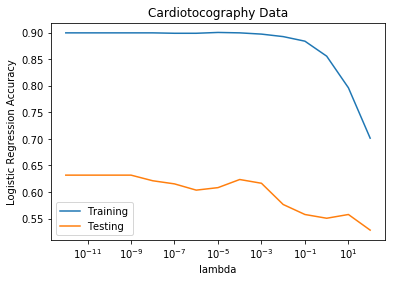

In [107]:
# Plot results of logistic regression parameter sweep

train_line = plt.semilogx(lambda_vals, train_accuracy, label="Training")
test_line = plt.semilogx(lambda_vals, test_accuracy, label="Testing")
plt.title('Cardiotocography Data')
plt.xlabel('lambda')
plt.ylabel('Logistic Regression Accuracy')
plt.legend()
print(test_accuracy)